<a href="https://colab.research.google.com/github/Tushar243924/AI-and-ML-Integration-Projects/blob/main/SMS_Spam_Detection_with_AI_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Libraries

In [77]:
#!pip show numpy
#!pip show pandas
#!pip show nltk

In [78]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk

## 2. Download and read the dataset

In [79]:
df_sms = pd.read_csv('spam.csv',encoding='latin-1')
df_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## 3. Data processing

In [80]:
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


1. Dropping the unwanted columns

In [81]:
df_sms = df_sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_sms = df_sms.rename(columns={"v1":"label", "v2":"sms"})
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [82]:
# Check maximum length of SMS
print(len(df_sms))

5572


In [83]:
# Number of observations in each label spam and ham
df_sms.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [84]:
df_sms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [85]:
# Add a column length for sms length
df_sms['length'] = df_sms['sms'].apply(len)
df_sms.head()


,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## 4. EDA

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<Axes: ylabel='Frequency'>

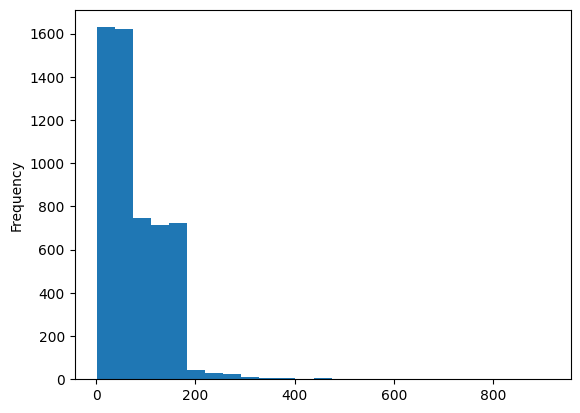

In [87]:
#Plot SMS length distribution
df_sms['length'].plot(bins=25, kind='hist')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

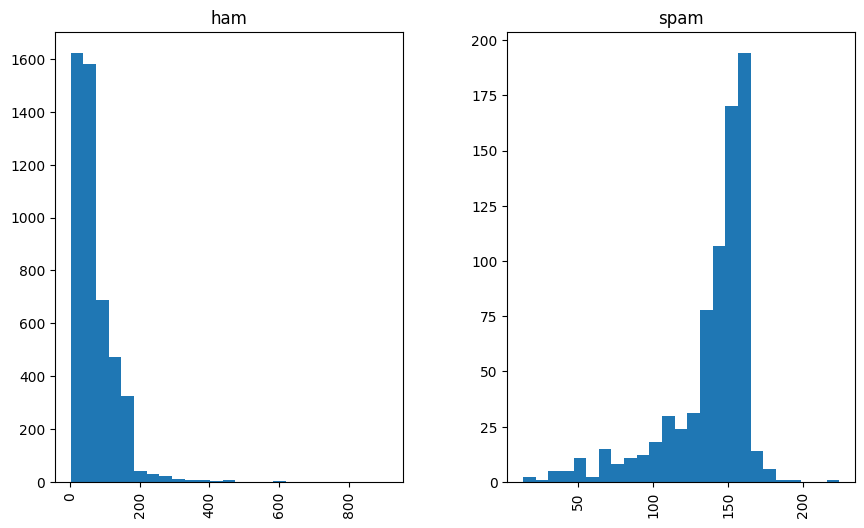

In [88]:
#Plot SMS length distribution for ham and span SMS
df_sms.hist(column='length', by='label', bins=25, figsize=(10, 6))

## 5. Data processing

In [89]:
# Replace ham with 0 and spam with 1
df_sms.loc[:,'label'] = df_sms.label.map({'ham': 0, 'spam':1})
print(df_sms.shape)
df_sms.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


## 6. Extracting features from the text for use in machine learning algorithms

- Tokenized words for each observation and find out the frequency of each token
- Build a frequency distribution matrix for set of text
- Implement Bag of Words Approach a) by doing code ourself b) by using scikit-learn

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [91]:
#Split train and test dataset for label and non-label data
X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], df_sms['label'],
                                                    test_size = 0.20, random_state=1)

In [92]:
# Instantiate the CounterVectorizer methiod
count_vector = CountVectorizer()

In [93]:
# Fit the training data and then return the matrix
train_data = count_vector.fit_transform(X_train)

In [94]:
#check datatype
train_data

<4457x7774 sparse matrix of type '<class 'numpy.int64'>'
	with 59357 stored elements in Compressed Sparse Row format>

In [95]:
#Check datatype
y_train.info()

<class 'pandas.core.series.Series'>
Index: 4457 entries, 1642 to 5157
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
4457 non-null   object
dtypes: object(1)
memory usage: 69.6+ KB


In [96]:
# Transform test data and then return the matrix
test_data = count_vector.transform(X_test)

## 7. Implementation of Naive Bayes Machine Learning Algorithm

In [97]:
from sklearn.naive_bayes import MultinomialNB

In [98]:
# Instantiate the MultinomialNB model
naive_bayes = MultinomialNB()


In [99]:
#change datatype as int for y_train
y_train = y_train.astype('int')
y_train.info()

<class 'pandas.core.series.Series'>
Index: 4457 entries, 1642 to 5157
Series name: label
Non-Null Count  Dtype
--------------  -----
4457 non-null   int64
dtypes: int64(1)
memory usage: 69.6 KB


In [100]:
# Train model on trail data - fit
naive_bayes.fit(train_data, y_train)

MultinomialNB()

In [101]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [102]:
#Prediction for test data
predictions = naive_bayes.predict(test_data)

## 8. Model Evaluation

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [104]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 1115 entries, 1078 to 90
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
1115 non-null   object
dtypes: object(1)
memory usage: 17.4+ KB


In [105]:
#change datatype as int for y_test
y_test = y_test.astype('int')
y_test.info()

<class 'pandas.core.series.Series'>
Index: 1115 entries, 1078 to 90
Series name: label
Non-Null Count  Dtype
--------------  -----
1115 non-null   int64
dtypes: int64(1)
memory usage: 17.4 KB


In [106]:
# Display value for all four model evaluation metrices

print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('f1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9847533632286996
Precision score: 0.9420289855072463
Recall score: 0.935251798561151
f1 score: 0.9386281588447652


### End of work book ###